# Bay Wheels Bike Sharing System Usage Trend in 2020
## by Osama Ghozlan

## Investigation Overview

> [Bay Wheels](https://en.wikipedia.org/wiki/Bay_Wheels) (formerly known as Ford GoBike) is the first regional public large-scale bicycle sharing system in California's San Francisco Bay Area and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. The goal of the investigation is to gain insight about the usage, trends and behaviours of the users which use the system in order to increase its efficency and provide a more flexible sharing experience based on the data available from this year (2020)

## Dataset Overview

> Each trip data is anonymously collected and includes details such trip duration, start/end Time and date and so on. The dataset used for this exploratory analysis consists of [monthly individual trip data](https://www.lyft.com/bikes/bay-wheels/system-data) from January 2020 to August 2020 in CSV format covering the greater San Francisco Bay area which are available [here](https://s3.amazonaws.com/baywheels-data/index.html). This data was wrangled and used to provide the visualiztions below which were important in the facilitation of the exploratory analysis which is crucial for finding the behaviour of the users

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
from geopy.distance import distance as g_dist
import matplotlib.dates as mdates

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
!rm *.csv
!rm -rfv __MACOSX

removed ‘__MACOSX/._202003-baywheels-tripdata.csv’
removed ‘__MACOSX/._202008-baywheels-tripdata.csv’
removed ‘__MACOSX/._202007-baywheels-tripdata.csv’
removed ‘__MACOSX/._202001-baywheels-tripdata.csv’
removed ‘__MACOSX/._202005-baywheels-tripdata.csv’
removed ‘__MACOSX/._202002-baywheels-tripdata.csv’
removed ‘__MACOSX/._202006-baywheels-tripdata.csv’
removed ‘__MACOSX/._202004-baywheels-tripdata.csv’
removed directory: ‘__MACOSX’


In [3]:
!wget -O 202001-baywheels-tripdata.csv.zip https://s3.amazonaws.com/baywheels-data/202001-baywheels-tripdata.csv.zip
!wget -O 202002-baywheels-tripdata.csv.zip https://s3.amazonaws.com/baywheels-data/202002-baywheels-tripdata.csv.zip
!wget -O 202003-baywheels-tripdata.csv.zip https://s3.amazonaws.com/baywheels-data/202003-baywheels-tripdata.csv.zip
!wget -O 202004-baywheels-tripdata.csv.zip https://s3.amazonaws.com/baywheels-data/202004-baywheels-tripdata.csv.zip
!wget -O 202005-baywheels-tripdata.csv.zip https://s3.amazonaws.com/baywheels-data/202005-baywheels-tripdata.csv.zip
!wget -O 202006-baywheels-tripdata.csv.zip https://s3.amazonaws.com/baywheels-data/202006-baywheels-tripdata.csv.zip
!wget -O 202007-baywheels-tripdata.csv.zip https://s3.amazonaws.com/baywheels-data/202007-baywheels-tripdata.csv.zip
!wget -O 202008-baywheels-tripdata.csv.zip https://s3.amazonaws.com/baywheels-data/202008-baywheels-tripdata.csv.zip

--2020-09-19 14:56:50--  https://s3.amazonaws.com/baywheels-data/202001-baywheels-tripdata.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.81.238
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.81.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9934176 (9.5M) [application/zip]
Saving to: ‘202001-baywheels-tripdata.csv.zip’

100%[======================================>] 9,934,176   25.0MB/s   in 0.4s   

2020-09-19 14:56:51 (25.0 MB/s) - ‘202001-baywheels-tripdata.csv.zip’ saved [9934176/9934176]

--2020-09-19 14:56:52--  https://s3.amazonaws.com/baywheels-data/202002-baywheels-tripdata.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.81.238
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.81.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14551210 (14M) [application/zip]
Saving to: ‘202002-baywheels-tripdata.csv.zip’

100%[======================================>] 14,551,210  38.1

In [4]:
!unzip \*-baywheels-tripdata.csv.zip

Archive:  202006-baywheels-tripdata.csv.zip
  inflating: 202006-baywheels-tripdata.csv  
   creating: __MACOSX/
  inflating: __MACOSX/._202006-baywheels-tripdata.csv  

Archive:  202005-baywheels-tripdata.csv.zip
  inflating: 202005-baywheels-tripdata.csv  
  inflating: __MACOSX/._202005-baywheels-tripdata.csv  

Archive:  202004-baywheels-tripdata.csv.zip
  inflating: 202004-baywheels-tripdata.csv  
  inflating: __MACOSX/._202004-baywheels-tripdata.csv  

Archive:  202003-baywheels-tripdata.csv.zip
  inflating: 202003-baywheels-tripdata.csv  
  inflating: __MACOSX/._202003-baywheels-tripdata.csv  

Archive:  202001-baywheels-tripdata.csv.zip
  inflating: 202001-baywheels-tripdata.csv  
  inflating: __MACOSX/._202001-baywheels-tripdata.csv  

Archive:  202002-baywheels-tripdata.csv.zip
  inflating: 202002-baywheels-tripdata.csv  
  inflating: __MACOSX/._202002-baywheels-tripdata.csv  

Archive:  202007-baywheels-tripdata.csv.zip
  inflating: 202007-baywheels-tripdata.csv  
  inflating:

In [5]:
trips20_q1 = pd.concat([pd.read_csv(f"20200{i}-baywheels-tripdata.csv") for i in range(1, 4)], sort=True)
trips20_q2 = pd.concat([pd.read_csv(f"20200{i}-baywheels-tripdata.csv") for i in range(4, 9)], sort=True)

In [6]:
trips20_q1.rename(columns={'end_time' : 'ended_at', 'start_time' : 'started_at',
                           'end_station_latitude' : 'end_lat', 'end_station_longitude' : 'end_lng',
                           'start_station_latitude' : 'start_lat', 'start_station_longitude' : 'start_lng'}, inplace=True)
trips20_q2.rename(columns={'member_casual' : 'user_type'}, inplace=True)

In [7]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
months = [datetime.datetime(2020, i, 1).strftime('%B') for i in range(1, 13)]
day_category = pd.api.types.CategoricalDtype(ordered=True, categories=weekdays)
month_category = pd.api.types.CategoricalDtype(ordered=True, categories=months)
for frame in [trips20_q1, trips20_q2]:
    frame['started_at'] = pd.to_datetime(frame['started_at'])
    frame['ended_at'] = pd.to_datetime(frame['ended_at'])
    frame['end_station_id'] = frame['end_station_id'].astype('str')
    frame['start_station_id'] = frame['start_station_id'].astype('str')
    frame['started_at_hour'] = frame['started_at'].dt.strftime('%H')
    frame['started_at_day'] = frame['started_at'].dt.strftime('%A').astype(day_category)
    frame['started_at_month'] = frame['started_at'].dt.strftime('%B').astype(month_category)
    if 'duration_sec' not in frame.columns:
        secs = abs(frame['ended_at'] - frame['started_at'])
        frame['duration_sec'] = secs.dt.seconds
    if 'is_equity' in frame.columns:
        frame['user_type'] = frame['user_type'].str.replace("member", "Subscriber", case=False, regex=False)
        frame['user_type'] = frame['user_type'].str.replace("casual", "Customer", case=False, regex=False)
    frame['user_type'] = frame['user_type'].astype('category')
    frame['duration_min'] = frame['duration_sec'] / 60

In [8]:
vars_q = ['user_type', 'end_lat', 'end_lng', 'end_station_name', 'start_lat', 'start_lng', 'start_station_name', 'duration_min', 'started_at_month', 'started_at', 'ended_at']
df_t20 = pd.DataFrame(trips20_q1[vars_q].append(trips20_q2[vars_q]))
df_t20 = df_t20.dropna()
df_t20 = df_t20[df_t20['start_station_name'] != df_t20['end_station_name']]
df_t20['trip_distance'] = df_t20.apply(lambda r: g_dist((r['start_lat'], r['start_lng']), (r['end_lat'], r['end_lng'])).km, axis=1)
df_t20['started_at_epoch'] = df_t20['started_at'].apply(lambda r: int(mdates.epoch2num(r.value/1e9)))

## Monthly usage of the two user types

> The bike usage between the two user types is fairly similar. The majority of the users in the first three months was dominated by the subscribers which became the complete opposite afterwards with the customers being the bigger group using the system. This could be as a result of the weather conditions in addition to the fact that many people found it more appealing to do activities outdoor (in the open air) which has little risk of being contaminated with the virus and helps break the general mood of the lockdown and curfews

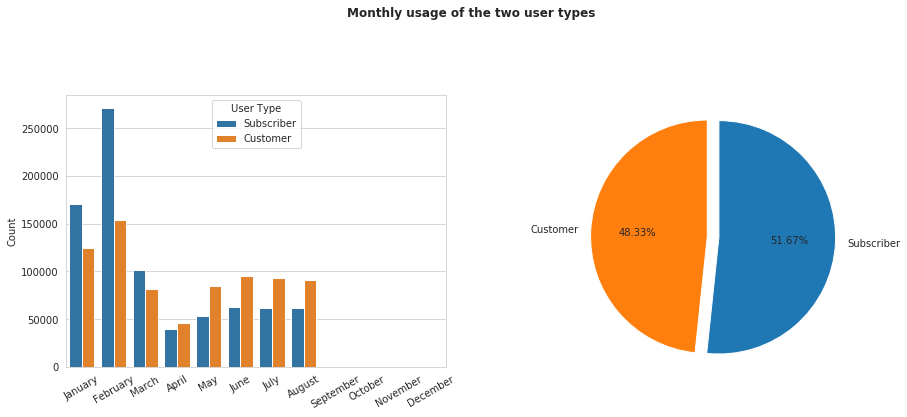

In [9]:
plt.figure(figsize=[15, 5]);
base_color = sb.color_palette('colorblind')[0];
sb.set_style('whitegrid');

plot_var = pd.DataFrame(trips20_q1[['user_type', 'started_at_month']].append(trips20_q2[['user_type', 'started_at_month']]))
user_vals = plot_var['user_type'].value_counts()/len(plot_var);

plt.suptitle('Monthly usage of the two user types', fontsize=12, fontweight='semibold', y=1.125);

plt.subplot(1, 2, 1);
ax = sb.countplot(data=plot_var, x='started_at_month', hue='user_type', hue_order=user_vals.index);
ax.legend(title='User Type');
ax.tick_params(axis='x', labelrotation=30)
ax.set_xlabel('');
ax.set_ylabel('Count');

plt.subplot(1, 2, 2);
plt.pie(user_vals, explode=[0, 0.1], labels=user_vals.index, startangle=90, counterclock=False, autopct='%1.2f%%', shadow=False);
plt.axis('square');

## Monthly trip distances for each of the user types

> Customers had more (shorter) trips than the Subscribers (January has two white slots in the subscribers which indicates almost no activity) in both January and February while the Subscribers while the Subscribers overall had more trips the customers

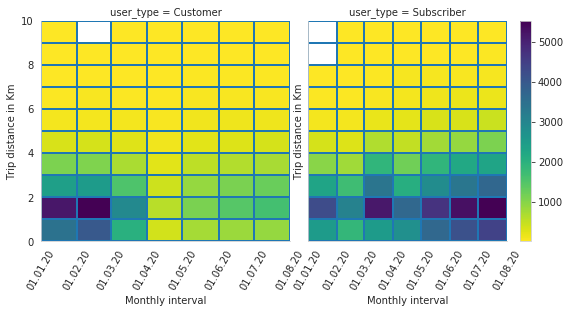

In [10]:
bins_x = np.arange(0, 11, 1)
t_bins = []
for i in range(1,9):
    date = datetime.datetime(year=2020, month=i, day=1)
    t_bins.append(date.timestamp())
t_bins = mdates.epoch2num(t_bins)  
d = df_t20[df_t20['trip_distance'] <= 10]
d = d.sample(round(len(d)/2), random_state=1)
grid = sb.FacetGrid(data=d, col='user_type', height=4)
# grid.map(plt.hist2d, 'started_at_month', 'trip_distance', cmin=0.5, cmap='viridis_r') #, bins=[bins_x, bins_y]);
grid.map(plt.hist2d, 'started_at_epoch', 'trip_distance', cmin=0.5, cmap='viridis_r', bins=[t_bins, bins_x]);
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
for a in grid.axes.flatten():
    a.set_xlabel('Monthly interval')
    a.set_ylabel('Trip distance in Km')
    a.tick_params(axis='x', labelrotation=60) 
plt.colorbar();

## The average trip duration for both user types on a weekly basis
> Customers tend to ride much longer trips in comparison to subscribers on every day of the week with a noticable increase in the trip duration for both user types on the weekends (Saturdays and Sundays) which shows that the subscribers mainly use the system for work and use it in an efficent manner

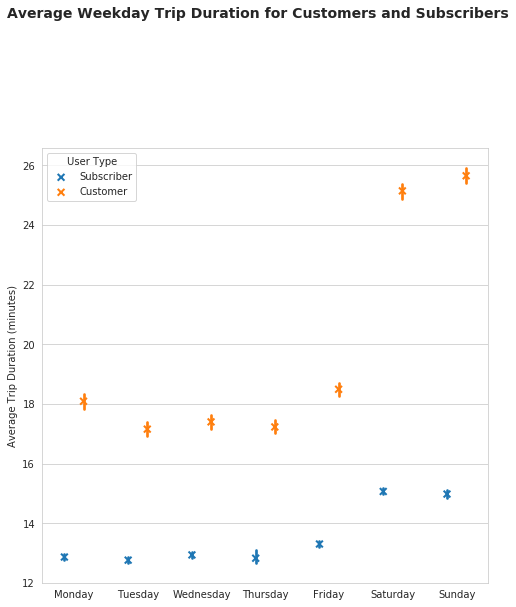

In [25]:
d = pd.DataFrame(trips20_q1[['user_type', 'started_at_day', 'duration_min']].append(trips20_q2[['user_type', 'started_at_day', 'duration_min']]))
user_vals = d['user_type'].value_counts()/len(d);
plt.figure(figsize=[8, 8]);
plt.suptitle('Average Weekday Trip Duration for Customers and Subscribers', fontsize=14, fontweight='semibold', y=1.125);
ax = sb.pointplot(data=d, x='started_at_day', y='duration_min', hue='user_type', dodge=0.5, markers='x', linestyles="", hue_order=user_vals.index);
ax.legend(title='User Type');
ax.set_xlabel('');
ax.set_ylabel('Average Trip Duration (minutes)');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!